In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
dataset=r'dataset/'
imagePaths=list(paths.list_images(dataset))
#importing images and diving in two list that is with mask or without mask

In [4]:
imagePaths

1eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4b8a40a8-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/49a81170-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4993e97a-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/49d5d218-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4a783062-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4ecaccf6-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4b6bb82c-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4c74085a-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/images (3).jpeg',
 'dataset/without mask/4cbfb5a2-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4ea6cb08-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4b018830-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4deb6656-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/download (10).jpeg',
 'dataset/without mask/4b8079c4-19f4-11eb-b67b-4719cfe02c03.jpg',
 'dataset/without mask/4eda10

In [5]:
data=[]#x value
labels=[]#y value

for i in imagePaths:
    label=i.split(os.path.sep)[-2]#to check the category that why -2 that is label is with mask or without mask
    labels.append(label)#get added to label
    image=load_img(i,target_size=(224,224))#making image size same 
    image =img_to_array(image)#can't use pictures to train the dataset
#need an array which represent images and then forms 
    image=preprocess_input(image)
    data.append(image)


In [6]:
labels#this is our y value

['with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with mask',
 'with

In [7]:
data

, -0.92156863, -0.90588236]],
 
        [[-0.44313723, -0.8745098 , -0.8352941 ],
         [-0.4352941 , -0.8666667 , -0.827451  ],
         [-0.4352941 , -0.8666667 , -0.827451  ],
         ...,
         [-0.8745098 , -0.92156863, -0.90588236],
         [-0.8745098 , -0.92156863, -0.90588236],
         [-0.88235295, -0.92941177, -0.9137255 ]],
 
        [[-0.44313723, -0.8745098 , -0.8352941 ],
         [-0.44313723, -0.8745098 , -0.8352941 ],
         [-0.4352941 , -0.8666667 , -0.827451  ],
         ...,
         [-0.8745098 , -0.92156863, -0.90588236],
         [-0.8745098 , -0.92156863, -0.90588236],
         [-0.88235295, -0.92941177, -0.9137255 ]]], dtype=float32),
 array([[[ 0.12941182,  0.09019613,  0.3411765 ],
         [-0.26274508, -0.29411763, -0.08235294],
         [-0.41960782, -0.5137255 , -0.40392154],
         ...,
         [ 0.48235297,  0.5921569 ,  0.69411767],
         [ 0.5137255 ,  0.5529412 ,  0.70980394],
         [ 0.60784316,  0.56078434,  0.84313726]],
 
  

In [8]:
image

array([[[ 0.18431377,  0.13725495,  0.3411765 ],
        [-0.29411763, -0.47450978, -0.31764704],
        [-0.23921567, -0.5294118 , -0.46666664],
        ...,
        [ 0.3176471 ,  0.427451  ,  0.654902  ],
        [ 0.43529415,  0.5058824 ,  0.73333335],
        [ 0.49803925,  0.5529412 ,  0.75686276]],

       [[ 0.15294123,  0.12156868,  0.30196083],
        [-0.17647058, -0.30196077, -0.19999999],
        [-0.27058822, -0.5058824 , -0.49019605],
        ...,
        [ 0.427451  ,  0.5372549 ,  0.7490196 ],
        [ 0.4901961 ,  0.5764706 ,  0.79607844],
        [ 0.39607847,  0.45098042,  0.654902  ]],

       [[-0.01176471, -0.05098039,  0.12156868],
        [-0.2235294 , -0.32549018, -0.24705881],
        [-0.25490195, -0.4588235 , -0.46666664],
        ...,
        [-0.18431371, -0.06666666,  0.11372554],
        [ 0.0196079 ,  0.11372554,  0.30196083],
        [ 0.12941182,  0.20784318,  0.4039216 ]],

       ...,

       [[ 0.13725495,  0.19215691,  0.05098045],
        [ 0

In [9]:
data=np.array(data,dtype='float32')
labels=np.array(labels)
#converting it into numpy aaray so that we can easily access the data labels X and Y


In [10]:
data.shape

(751, 224, 224, 3)

In [11]:
labels; data# demo output

array([[[[ 0.41960788,  0.37254906,  0.45098042],
         [-0.05098039, -0.17647058, -0.09019607],
         [-0.06666666, -0.36470586, -0.27843136],
         ...,
         [ 0.7647059 ,  0.85882354,  0.9529412 ],
         [ 0.84313726,  0.90588236,  0.99215686],
         [ 0.8039216 ,  0.9529412 ,  1.        ]],

        [[ 0.43529415,  0.4039216 ,  0.52156866],
         [-0.19215685, -0.2862745 , -0.19215685],
         [-0.06666666, -0.3098039 , -0.24705881],
         ...,
         [ 0.5686275 ,  0.6627451 ,  0.77254903],
         [ 0.56078434,  0.60784316,  0.73333335],
         [ 0.56078434,  0.654902  ,  0.7490196 ]],

        [[ 0.5058824 ,  0.47450984,  0.5921569 ],
         [-0.01960784, -0.09019607, -0.05098039],
         [-0.04313725, -0.23137254, -0.26274508],
         ...,
         [ 0.56078434,  0.654902  ,  0.78039217],
         [ 0.6313726 ,  0.6862745 ,  0.827451  ],
         [ 0.60784316,  0.70980394,  0.8352941 ]],

        ...,

        [[ 0.26274514,  0.33333337,  0

In [12]:
lb=LabelBinarizer()
#LabelBinarizer purpose is to fit and transform the labels 
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
# for model to understand we need to catgorically label the data sets


In [13]:
labels#here how it is categorical represented
#now the labels are readable

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
#it checks the ratio with mask or without mask so that input data is in same ratio
# now we need to train and test  how accurate is our model
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X

array([[[[ 0.10588241,  0.082353  ,  0.24705887],
         [-0.38823527, -0.45098037, -0.3333333 ],
         [-0.35686272, -0.5686275 , -0.45098037],
         ...,
         [ 0.28627455,  0.3803922 ,  0.58431375],
         [ 0.36470592,  0.45098042,  0.60784316],
         [ 0.45882356,  0.5137255 ,  0.6392157 ]],

        [[ 0.1686275 ,  0.14509809,  0.27843142],
         [-0.32549018, -0.38823527, -0.2862745 ],
         [-0.36470586, -0.54509807, -0.46666664],
         ...,
         [ 0.41176474,  0.4901961 ,  0.7019608 ],
         [ 0.37254906,  0.45882356,  0.6313726 ],
         [ 0.34901965,  0.39607847,  0.58431375]],

        [[ 0.05882359,  0.03529418,  0.1686275 ],
         [-0.30196077, -0.35686272, -0.29411763],
         [-0.42745095, -0.60784316, -0.56078434],
         ...,
         [-0.20784312, -0.14509803,  0.00392163],
         [ 0.04313731,  0.12941182,  0.27058828],
         [ 0.254902  ,  0.30196083,  0.47450984]],

        ...,

        [[ 0.13725495,  0.18431377,  0

In [16]:

train_Y.shape

(600, 2)

In [17]:
test_X.shape

(151, 224, 224, 3)

In [18]:
#Data is Ready now Image data generator 
#that is generate more no. of images
#it will roatate and image by 20 % and then check
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
#defined the parameter
aug


In [19]:
#making cnn 
# Base model is mobile.net
#Mobilenet was created to use thosands of classes but we are using 2 classes only , With Mask and without mask
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))# 3 becoz we have coloured images



In [20]:
# we have Trainable params: 2,223,872 but we don't need to train nay of the parameters 
#Tranfer Learning , you can train with samll data sets and use on large data

In [21]:
"""headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)#SElects the Average feature to predict the model
#like in this case it will take face if nose is covered it show marks else no marks
headModel=Flatten(name='Flatten')(headModel)#
headModel=Dense(128,activation='relu')(headModel)#connecting 128 neurons of layer
headModel=Dropout(0.5)(headModel)#nderfitting doesn't occur in CNN
headModel=Dense(2,activation='softmax')(headModel)
model=Model(inputs=baseModel.input,output=headModel)
"""
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [22]:
for layer in baseModel.layers:
    layer.trainable=False

In [23]:
model.summary()

[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0]             
__________________________________________________________________________________________________
block_7_expand_relu (ReLU)      (None, 14, 14, 384)  0           block_7_expand_BN[0][0]          
__________________________________________________________________________________________________
block_7_depthwise (DepthwiseCon (None, 14, 14, 384)  3456        block_7_expand_relu[0][0]        
__________________________________________________________________________________________________
block_7_depthwise_BN (BatchNorm (None, 14, 14, 384)  1536        block_7_depthwise[0][0]  

In [24]:
# The trainable parameters are 2399098
#and non - Trainable is 34112
#Sice we are not training the last layer so now Trainable are changed

In [25]:
"""learning_rate=0.0001
#how fast it reaches to minium loss
#this are standard values
Epochs=20
#how many time it reads images
BS=12
#How many models you train at onces depends on ur ram
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
#its Adam Optimizer
model.compile(loss='binary_crossentropy',Optimizer=opt,metrics=['aacuray'])
# using Binary becoz we have 2 classes but in case of multiple we use categorical_crossentropy
#metrics=['aacuray'] :-We want to see the matrics that contains accuracy of the model


H=model.fit(
    aug.flow(train_x,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,train_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

model.save('mobilenet_v2.model')"""
learning_rate=0.001
Epochs=10
BS=32
#for small dataset batchsize should be less
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'mobilenet_v2.model')

Epoch 1/10
18/18 [==============================] - 14s 758ms/step - loss: 0.4714 - accuracy: 0.7852 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 2/10
18/18 [==============================] - 13s 711ms/step - loss: 0.1516 - accuracy: 0.9375 - val_loss: 0.0334 - val_accuracy: 0.9934
Epoch 3/10
18/18 [==============================] - 13s 715ms/step - loss: 0.0868 - accuracy: 0.9701 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 13s 707ms/step - loss: 0.0612 - accuracy: 0.9789 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 13s 706ms/step - loss: 0.0875 - accuracy: 0.9701 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 13s 705ms/step - loss: 0.0576 - accuracy: 0.9842 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 13s 713ms/step - loss: 0.0479 - accuracy: 0.9806 - val_loss: 0.0226 - val_accuracy: 0.9934

In [26]:
 z=H.history["loss"]

In [27]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
#which output is having having maximum probability weather its with mask or without mask
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with mask       1.00      1.00      1.00        67
without mask       1.00      1.00      1.00        84

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



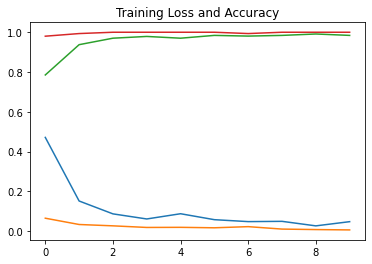

In [39]:
N = Epochs
#plt.style.use("ggplot")
#plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
#plt.scatter(H.history["loss"],np.arange(0, N))


plt.show()